<a href="https://colab.research.google.com/github/umiSirya/Weather_Prediction_capstone_project/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import the Necessary Libraries**

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Load and Prepare the Dataset**

In [35]:
df=pd.read_csv('/content/result.csv')
df.head()

,Y,X,uv_index_hourly_average,url,dataset,instance_datetime,platform_id,platform_name,country,gaw_id,instrument_name,instrument_model,instrument_number,uv_index_qa,instance_hour,platform_type,data_payload_id,latest_observation,uv_index_daily_max,agency
0,45.74,7.36,0.177875,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,9.0,STN,2884025,0,1.19455,ARPA-VDA
1,45.74,7.36,0.989250,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,11.0,STN,2884032,0,1.19455,ARPA-VDA
2,45.74,7.36,1.194550,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,13.0,STN,2884039,0,1.19455,ARPA-VDA
3,45.74,7.36,0.188125,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/31 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,16.0,STN,2884049,0,1.19455,ARPA-VDA
4,45.74,7.36,0.544150,http://woudc.org/archive/Archive-NewFormat/Spe...,Spectral,2017/10/30 00:00:00,479,Aosta,ITA,AST,brewer,MKIV,66,P,15.0,STN,2880762,0,1.49725,ARPA-VDA


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27338 entries, 0 to 27337
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Y                        27338 non-null  float64
 1   X                        27338 non-null  float64
 2   uv_index_hourly_average  27338 non-null  float64
 3   url                      27338 non-null  object 
 4   dataset                  27338 non-null  object 
 5   instance_datetime        27338 non-null  object 
 6   platform_id              27338 non-null  int64  
 7   platform_name            27338 non-null  object 
 8   country                  27338 non-null  object 
 9   gaw_id                   27338 non-null  object 
 10  instrument_name          27338 non-null  object 
 11  instrument_model         27338 non-null  object 
 12  instrument_number        27338 non-null  int64  
 13  uv_index_qa              27338 non-null  object 
 14  instance_hour         

# **3. Data Cleaning**

In [37]:
# Convertdate column is in datetime format
df['instance_date'] = pd.to_datetime(df['instance_datetime'])

# Sort the DataFrame by date in ascending order
df = df.sort_values(by='instance_date', ascending=True).reset_index(drop=True)

# Choosing relevant columns
df = df[['instance_date', 'uv_index_daily_max']]

# Keep only the first row for each date
df = df.drop_duplicates(subset='instance_date', keep='first').reset_index(drop=True)


In [38]:
#checking for null values
df.isnull().sum()

,0
instance_date,0
uv_index_daily_max,0


In [39]:
print(df.head())

  instance_date  uv_index_daily_max
0    1991-08-01             2.84574
1    1991-08-06             3.28148
2    1991-08-07             2.60597
3    1991-08-08             1.55984
4    1991-08-09             2.74034


In [42]:
print(df.tail())

     instance_date  uv_index_daily_max
6807    2017-10-27             0.94430
6808    2017-10-28             1.54505
6809    2017-10-29             1.46823
6810    2017-10-30             1.49725
6811    2017-10-31             1.19455


In [40]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instance_date       6812 non-null   datetime64[ns]
 1   uv_index_daily_max  6812 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 106.6 KB


<ipython-input-41-597bd890e5d9>:23: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


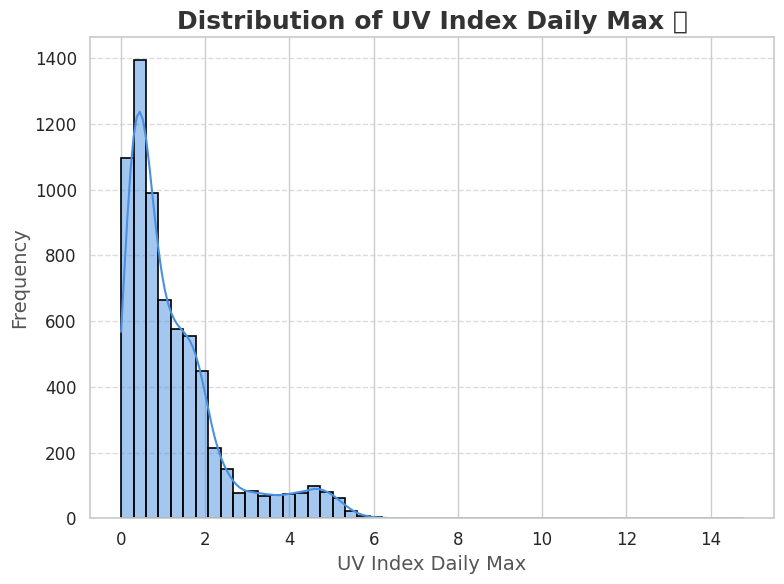

In [41]:
#Frequency Distribution of UV Index daily max

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.histplot(
    data=df,
    x='uv_index_daily_max',
    bins=50,
    kde=True,
    color="#4A90E2",
    edgecolor="black",
    linewidth=1.2
)


plt.title('Distribution of UV Index Daily Max 🌞', fontsize=18, fontweight='bold', color="#333333")
plt.xlabel('UV Index Daily Max', fontsize=14, color="#555555")
plt.ylabel('Frequency', fontsize=14, color="#555555")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
# saving cleaned data into a csv file
df.to_csv('cleaned_uv_data.csv', index=False)
